In [1]:
import numpy as np
import pandas as pd
import plotly
import os
import json
import requests
import plotly.graph_objects as go

In [63]:
df_prod = pd.read_pickle('data/df_prod.pkl')
df_prod.columns = ['Area', 'Item', 'Element', 'Unit'] + [str(year) for year in range(1993, 2017)] 
df_prod_brazil = df_prod.loc[df_prod['Area'] == 'Brazil']\
                        .loc[df_prod['Element'] == 'Production']\
                        .sort_values(['2016'], ascending=False)\
                        .reset_index()
df_prod_brazil = df_prod_brazil[df_prod_brazil['2016'] != 0]

In [59]:
df_prod_brazil

,index,Area,Item,Element,Unit,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,4275,Brazil,Soybeans,Production,tonnes,22590978.0,24931832.0,25682637.0,23166874.0,26392636.0,...,57857172.0,59833104.0,57345382.0,68756343.0,74815447.0,65848857.0,81724477.0,86760520.0,97464936.0,96394820.0
1,4187,Brazil,Maize,Production,tonnes,30055633.0,32487625.0,36266951.0,29652791.0,32948044.0,...,52112217.0,58933347.0,50719822.0,55364271.0,55660235.0,71072810.0,80273172.0,79881614.0,85283074.0,64143414.0
2,4140,Brazil,Cassava,Production,tonnes,21855690.0,24464290.0,25422960.0,17743160.0,19896200.0,...,26541200.0,26703040.0,24403981.0,24967052.0,25349542.0,23044557.0,21484218.0,23253514.0,23059704.0,21084418.0
3,4216,Brazil,Oranges,Production,tonnes,18797188.0,17445968.0,19837212.0,21079044.0,23046800.0,...,18684984.0,18538084.0,17618450.0,18503139.0,19811064.0,18012560.0,17549536.0,16928457.0,16939635.0,17262314.0
4,4317,Brazil,Wheat,Production,tonnes,2197354.0,2096259.0,1533871.0,3292777.0,2489070.0,...,4114057.0,6027131.0,5055525.0,6171250.0,5690043.0,4418388.0,5738473.0,6261895.0,5508451.0,6834421.0
5,4115,Brazil,Bananas,Production,tonnes,5802992.0,5955238.0,5801110.0,5160178.0,5412360.0,...,7098350.0,6998150.0,6783490.0,6969306.0,7329471.0,6902184.0,6892622.0,6953747.0,6859227.0,6735260.0
6,4299,Brazil,Tomatoes,Production,tonnes,2348498.0,2688570.0,2715016.0,2648627.0,2717965.0,...,3431232.0,3867655.0,4310477.0,4106846.0,4416652.0,3873985.0,4187646.0,4302777.0,4187729.0,4167629.0
7,4241,Brazil,Potatoes,Production,tonnes,2367571.0,2488461.0,2692234.0,2412546.0,2670493.0,...,3550510.0,3676938.0,3443712.0,3547510.0,3917234.0,3731798.0,3553772.0,3689836.0,3867681.0,3851396.0
8,4308,Brazil,"Vegetables, fresh nes",Production,tonnes,2000000.0,2050000.0,2100000.0,2100000.0,2150000.0,...,2410000.0,2410000.0,2650000.0,2842215.0,2873134.0,2900000.0,2900000.0,2911788.0,2977044.0,3033272.0
9,4153,Brazil,"Coffee, green",Production,tonnes,1278759.0,1307289.0,930135.0,1369196.0,1228513.0,...,2249011.0,2796927.0,2440056.0,2907265.0,2700540.0,3037534.0,2964538.0,2804070.0,2647504.0,3019228.0


In [75]:
import plotly.graph_objects as go
years = [str(year) for year in range(1993, 2017)] 
fig = go.Figure()
items = df_prod_brazil['Item']
for i in range(0, 10):
    fig.add_trace(go.Scatter(x=years, y= df_prod_brazil.iloc[i][years], mode='lines', name=items[i], line = dict(width=4)))
fig.update_layout(title='Top 10 Produced Items in Brazil',
                   xaxis_title='Year',
                   yaxis_title='Weight (in tonnes)',
                  width=800,
                 height=500)
plotly.offline.plot(fig, filename='top10producedbrazil.html')

'top10producedbrazil.html'

In [64]:
df_prod_area_brazil = df_prod.loc[df_prod['Area'] == 'Brazil']
df_prod_area_brazil = df_prod_area_brazil[df_prod_area_brazil['Element'] == 'Area harvested']\
                        .sort_values(['2016'], ascending=False)\
                        .reset_index()\
                        .drop(columns=['index'])

In [65]:
df_prod_area_brazil

,Area,Item,Element,Unit,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Brazil,Soybeans,Area harvested,ha,10635330.0,11525410.0,11675005.0,10299470.0,11486478.0,13303656.0,...,20565279.0,21246302.0,21750468.0,23327296.0,23968663.0,24975258.0,27906675.0,30273763.0,32181243.0,33183119.0
1,Brazil,Maize,Area harvested,ha,11869663.0,13748813.0,13946320.0,11975811.0,12562130.0,10585498.0,...,13767400.0,14444582.0,13654715.0,12678875.0,13218892.0,14198496.0,15279652.0,15432909.0,15407143.0,14958862.0
2,Brazil,"Beans, dry",Area harvested,ha,3884340.0,5471320.0,5006400.0,4300513.0,4401770.0,3313620.0,...,3788279.0,3781908.0,4099991.0,3423646.0,3673162.0,2709485.0,2813506.0,3185745.0,2865396.0,2584170.0
3,Brazil,Wheat,Area harvested,ha,1482230.0,1348850.0,994734.0,1796005.0,1521545.0,1408850.0,...,1853224.0,2363893.0,2430253.0,2181567.0,2138916.0,1912711.0,2087395.0,2834945.0,2472628.0,2166170.0
4,Brazil,"Coffee, green",Area harvested,ha,2259330.0,2097650.0,1869980.0,1920250.0,1988190.0,2070410.0,...,2264129.0,2222224.0,2135508.0,2159785.0,2148775.0,2120080.0,2085522.0,1997827.0,1977714.0,1994908.0
5,Brazil,Cassava,Area harvested,ha,1811830.0,1850930.0,1946160.0,1508920.0,1551970.0,1578880.0,...,1894460.0,1888859.0,1760578.0,1789769.0,1733541.0,1692986.0,1525918.0,1568253.0,1512660.0,1406512.0
6,Brazil,"Cocoa, beans",Area harvested,ha,734124.0,698634.0,738536.0,661923.0,715671.0,709798.0,...,628928.0,641337.0,635975.0,660711.0,680484.0,684333.0,689276.0,704122.0,702841.0,720053.0
7,Brazil,Oranges,Area harvested,ha,800505.0,897985.0,856419.0,964373.0,985521.0,1018576.0,...,821244.0,836602.0,787250.0,792753.0,817292.0,729583.0,702200.0,680324.0,678807.0,659042.0
8,Brazil,Cashewapple,Area harvested,ha,726140.0,680615.0,699936.0,547720.0,582210.0,621419.0,...,731412.0,747434.0,758085.0,758988.0,764472.0,756846.0,695289.0,627137.0,590913.0,567557.0
9,Brazil,"Cashew nuts, with shell",Area harvested,ha,726140.0,680615.0,699936.0,547720.0,582210.0,621419.0,...,731412.0,747434.0,758085.0,758988.0,764472.0,756846.0,695289.0,627137.0,590913.0,567557.0


In [78]:
import plotly.graph_objects as go
years = [str(year) for year in range(1993, 2017)] 
fig = go.Figure()
items = df_prod_area_brazil['Item']
for i in range(0, 10):
    fig.add_trace(go.Scatter(x=years, y= df_prod_area_brazil.iloc[i][years]/100/41285, mode='lines', name=items[i], line = dict(width=4)))
fig.update_layout(title='How many Switzerlands can we fit in the harvested areas for the top produced items in Brazil',
                   xaxis_title='Year',
                   yaxis_title='Number of Switzerlands',
                  width=800,
                 height=500)
plotly.offline.plot(fig, filename='areaHarvestedSoybeansBrazil.html')

'areaHarvestedSoybeansBrazil.html'

In [8]:
df_trade = pd.read_pickle('data/df_trade_merged.pkl')
df_exports_brazil = df_trade.loc[df_trade['Exporter'] == 'Brazil']
df_exports_brazil = df_exports_brazil.groupby(['Exporter', 'Item']).sum().reset_index()
df_exports_brazil = df_exports_brazil.sort_values(['2016'], ascending = False).reset_index().drop(columns=['index'])

In [9]:
df_exports_brazil[df_exports_brazil['2016'] != 0]

,Exporter,Item,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Brazil,Soybeans,4773455.0,6420710.0,4194835.0,4740557.0,10396631.0,9558369.0,9664327.0,12592900.0,...,25381465.0,25597902.0,29875719.0,29612482.0,33886258.0,34843950.0,43256714.0,46832700.0,55178218.0,52754779.0
1,Brazil,Maize,19065.0,4984.0,51354.0,456036.0,526744.0,45843.0,225069.0,266707.0,...,11387143.0,7107614.0,8223117.0,11204856.0,10222914.0,20254299.0,28568420.0,21484244.0,29549904.0,24889242.0
2,Brazil,"Coffee, green",971818.0,891785.0,764812.0,782220.0,895572.0,990087.0,1259458.0,1053151.0,...,1626946.0,1682163.0,1777607.0,1905489.0,1919081.0,1651463.0,1825797.0,2129355.0,2161662.0,1971825.0
3,Brazil,Cotton lint,8922.0,3448.0,53701.0,6303.0,859.0,3919.0,4597.0,28942.0,...,429690.0,575043.0,616545.0,534862.0,761440.0,1095898.0,690274.0,753773.0,902980.0,904148.0
4,Brazil,Wheat,2505.0,5.0,135.0,571.0,55005.0,54958.0,2153.0,2125.0,...,160368.0,761858.0,466649.0,1413994.0,2582650.0,2519188.0,1360142.0,277025.0,1779645.0,892152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Brazil,Asparagus,0.0,14.0,6.0,1.0,3.0,1.0,3.0,2.0,...,0.0,2.0,3.0,3.0,29.0,4.0,1.0,2.0,5.0,2.0
87,Brazil,Spinach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0
88,Brazil,Pistachios,136.0,4.0,1.0,73.0,0.0,2.0,0.0,0.0,...,75.0,121.0,36.0,50.0,310.0,0.0,2.0,1.0,2.0,1.0
89,Brazil,Hops,13.0,27.0,38.0,62.0,39.0,0.0,0.0,3.0,...,5.0,11.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [77]:
import plotly.graph_objects as go
years = [str(year) for year in range(1993, 2017)] 
fig = go.Figure()
items = df_exports_brazil['Item']
for i in range(0, 10):
    fig.add_trace(go.Scatter(x=years, y=df_exports_brazil.iloc[i][years], mode='lines', name=items[i], line = dict(width=4)))
fig.update_layout(title='Top 10 Exported Items by Brazil',
                   xaxis_title='Year',
                   yaxis_title='Weight[tonnes]',
                  width=800,
                 height=500)
plotly.offline.plot(fig, filename='top10ExportedBrazil.html')

'top10ExportedBrazil.html'

In [11]:
df_imports_brazil = df_trade.loc[df_trade['Importer'] == 'Brazil']
df_imports_brazil = df_imports_brazil.groupby(['Importer', 'Item']).sum().reset_index()
df_imports_brazil = df_imports_brazil.sort_values(['2016'], ascending = False).reset_index().drop(columns=['index'])
df_imports_brazil[df_imports_brazil['2016'] != 0]

,Importer,Item,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Brazil,Wheat,6115768.0,6978869.0,6474255.0,8085885.0,5013566.0,6539666.0,6891008.0,7601386.0,...,6795641.0,6065774.0,5600332.0,6373241.0,5824146.0,6964204.0,7889646.0,6041161.0,5441503.0,7133356.0
1,Brazil,Maize,1389242.0,1502192.0,1309333.0,335436.0,597231.0,1869705.0,822292.0,1834324.0,...,1382351.0,770260.0,1232245.0,476119.0,749137.0,853901.0,911602.0,824634.0,370313.0,3319466.0
2,Brazil,Barley,124625.0,205541.0,268850.0,260412.0,129558.0,107261.0,61399.0,133776.0,...,264470.0,375168.0,489691.0,390796.0,320166.0,286509.0,409040.0,419878.0,477028.0,762613.0
3,Brazil,Soybeans,159333.0,1186342.0,878664.0,1064921.0,1451203.0,828228.0,611655.0,807541.0,...,156454.0,202817.0,251951.0,140465.0,57792.0,305061.0,321305.0,590515.0,341476.0,399390.0
4,Brazil,"Beans, dry",79874.0,221772.0,171505.0,82628.0,171787.0,228354.0,101207.0,81353.0,...,99284.0,220657.0,110238.0,196922.0,214073.0,324698.0,304083.0,142427.0,156788.0,343396.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Brazil,Figs,147.0,41.0,202.0,39.0,46.0,121.0,109.0,82.0,...,4.0,10.0,1.0,15.0,3.0,3.0,3.0,4.0,2.0,2.0
92,Brazil,"Fruit, tropical fresh nes",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,13.0,0.0,0.0,0.0,49.0,74.0,26.0,0.0,1.0
93,Brazil,Vanilla,3.0,5.0,23.0,23.0,5.0,9.0,8.0,15.0,...,35.0,8.0,16.0,5.0,1.0,1.0,2.0,4.0,3.0,1.0
94,Brazil,Kola nuts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


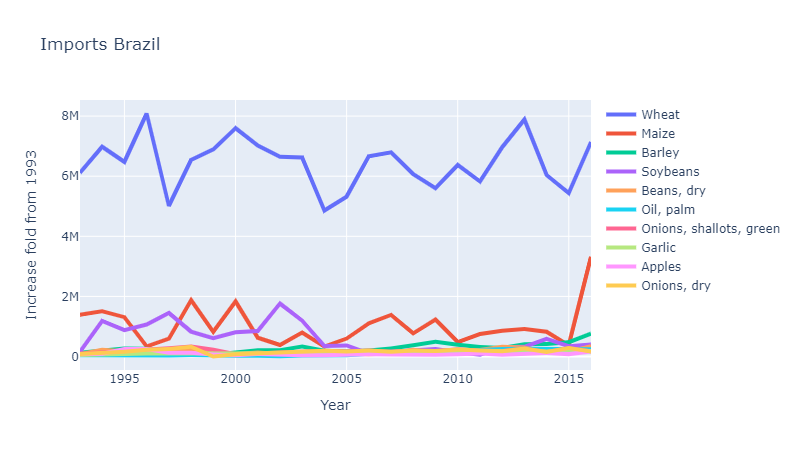

In [12]:
import plotly.graph_objects as go
years = [str(year) for year in range(1993, 2017)] 
fig = go.Figure()
items = df_imports_brazil['Item']
for i in range(0, 10):
    fig.add_trace(go.Scatter(x=years, y=df_imports_brazil.iloc[i][years], mode='lines', name=items[i], line = dict(width=4)))
fig.update_layout(title='Imports Brazil',
                   xaxis_title='Year',
                   yaxis_title='Increase fold from 1993')

In [40]:
df_soybeans_importers_brazil = df_trade.loc[df_trade['Exporter'] == 'Brazil'].loc[df_trade['Item'] == 'Soybeans']
df_soybeans_importers_brazil = df_soybeans_importers_brazil.groupby(['Exporter', 'Importer'])\
                                                           .sum() \
                                                           .reset_index()\
                                                           .sort_values(['2016'], ascending=False)\
                                                           .reset_index()\
                                                           .drop(columns=['index'])

In [41]:
df_importers_brazil

,index,Exporter,Importer,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,38,Brazil,"China, mainland",5345.0,4513.0,18518.0,53349.0,443089.0,948178.0,873710.0,...,10668143.0,11918244.0,16143142.0,18774185.0,22494801.0,24418569.0,32537230.0,32953100.0,41281574.0,38879481.0
1,85,Brazil,Iran (Islamic Republic of),0.0,0.0,0.0,0.0,15368.0,54851.0,294956.0,...,3119844.0,543807.0,1891836.0,1606530.0,2084199.0,3141785.0,2348631.0,4765630.0,4759892.0,5975745.0
2,91,Brazil,Japan,708816.0,879887.0,454021.0,475788.0,657264.0,631033.0,700994.0,...,611221.0,751519.0,1010731.0,1384846.0,1595097.0,3767358.0,5211574.0,2102874.0,3493046.0,4450669.0
3,187,Brazil,Viet Nam,0.0,0.0,115.0,160.0,5637.0,5732.0,431.0,...,10234.0,122069.0,212867.0,407406.0,669488.0,718245.0,1813989.0,3784332.0,6058578.0,3534948.0
4,143,Brazil,Republic of Korea,116345.0,187850.0,62773.0,124003.0,42044.0,42156.0,111493.0,...,1435164.0,1028629.0,1371642.0,959115.0,716047.0,3122478.0,4687774.0,2534397.0,4061782.0,3276632.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,106,Brazil,Madagascar,27.0,27.0,58.0,0.0,10.0,38.0,29.0,...,258.0,506.0,453.0,40.0,27.0,324.0,24.0,46.0,22.0,0.0
187,102,Brazil,Liberia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14000.0,0.0,0.0,25.0,0.0,0.0
188,97,Brazil,Kyrgyzstan,0.0,0.0,0.0,0.0,0.0,35.0,60.0,...,269.0,267.0,317.0,220.0,358.0,383.0,0.0,0.0,1.0,0.0
189,90,Brazil,Jamaica,0.0,69.0,59.0,88.0,119.0,236.0,158.0,...,52.0,30.0,91.0,73.0,30.0,20.0,29288.0,28.0,63.0,0.0


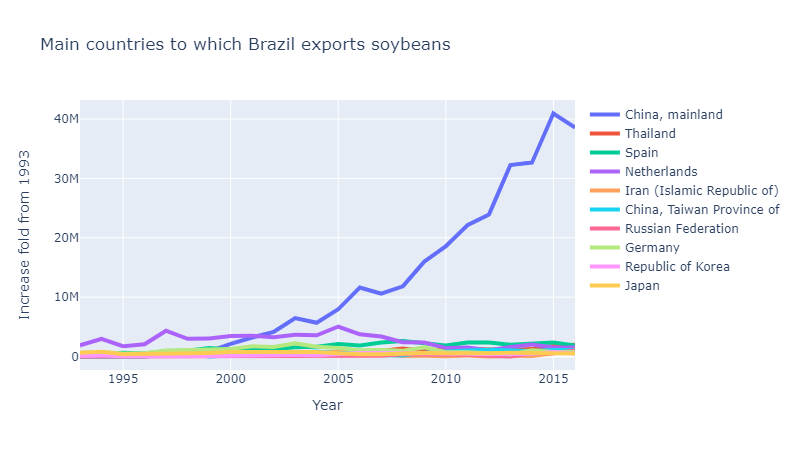

In [42]:
import plotly.graph_objects as go
years = [str(year) for year in range(1993, 2017)] 
fig = go.Figure()
countries = df_soybeans_importers_brazil['Importer']
for i in range(0, 10):
    fig.add_trace(go.Scatter(x=years, y=df_soybeans_importers_brazil.iloc[i][years], mode='lines', name=countries[i], line = dict(width=4)))
fig.update_layout(title='Main countries to which Brazil exports soybeans',
                   xaxis_title='Year',
                   yaxis_title='Increase fold from 1993')

In [43]:
df_importers_brazil = df_trade.loc[df_trade['Exporter'] == 'Brazil']
df_importers_brazil = df_importers_brazil.groupby(['Exporter', 'Importer'])\
                                         .sum() \
                                         .reset_index()\
                                         .sort_values(['2016'], ascending=False)\
                                         .reset_index()

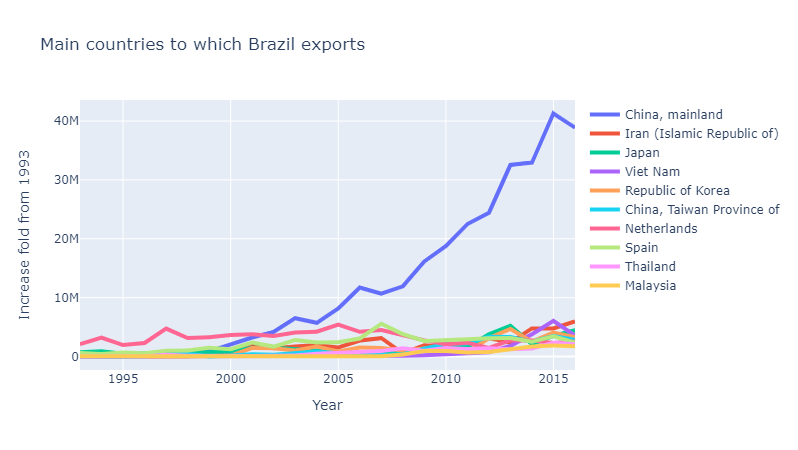

In [44]:
import plotly.graph_objects as go
years = [str(year) for year in range(1993, 2017)] 
fig = go.Figure()
countries = df_importers_brazil['Importer']
for i in range(0, 10):
    fig.add_trace(go.Scatter(x=years, y=df_importers_brazil.iloc[i][years], mode='lines', name=countries[i], line = dict(width=4)))
fig.update_layout(title='Main countries to which Brazil exports',
                   xaxis_title='Year',
                   yaxis_title='Increase fold from 1993')

In [46]:
df_maize_importers_brazil = df_trade.loc[df_trade['Exporter'] == 'Brazil'].loc[df_trade['Item'] == 'Maize']
df_maize_importers_brazil = df_maize_importers_brazil.groupby(['Exporter', 'Importer'])\
                                                           .sum() \
                                                           .reset_index()\
                                                           .sort_values(['2016'], ascending=False)\
                                                           .reset_index()\
                                                           .drop(columns=['index'])

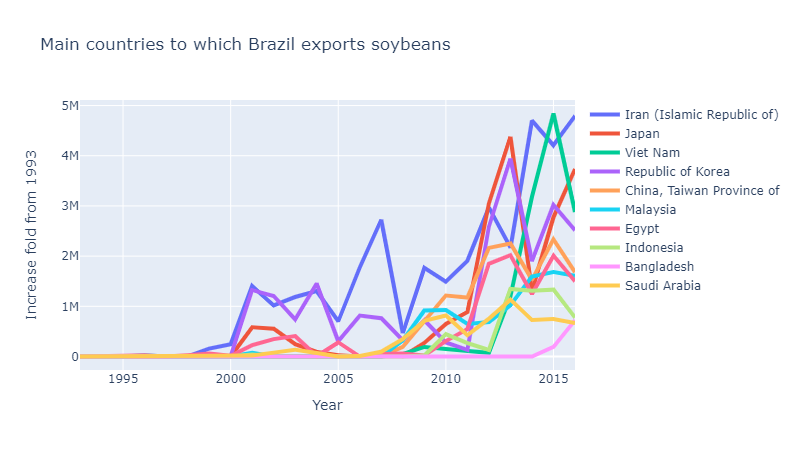

In [47]:
import plotly.graph_objects as go
years = [str(year) for year in range(1993, 2017)] 
fig = go.Figure()
countries = df_maize_importers_brazil['Importer']
for i in range(0, 10):
    fig.add_trace(go.Scatter(x=years, y=df_maize_importers_brazil.iloc[i][years], mode='lines', name=countries[i], line = dict(width=4)))
fig.update_layout(title='Main countries to which Brazil exports soybeans',
                   xaxis_title='Year',
                   yaxis_title='Increase fold from 1993')

# Data Story

Brazil's trade policies were mostly oriented inwards in the past. However, in the early 1990s, it liberalized its trade regime and quickly established itself as one the main trade giants in the world. Furthermore, we notice that the growth is not exactly linear, as we notice a certain plateau in the exports between 1993 and 1996. This was mainly due to a an unstable macroeconomic and international context. A surge in production at the end of the 1990s, along with sound macroeconomic policies, helped Brazil gain momentum and increase their exports.

Brazil mainly exports soybeans and maize, as it holds close proximity to the market of livestock and poultry

Expanding trade regimes as well as increasing production and exports mean GDP growth, but at what cost? To be able to export that much soybeans and maize, Brazil has to find more arable land. And where else can it find it than in the Amazon? The promotion of those products is a major driver for deforestation in the Amazon, which contributes directly to climate change. This uncontrollable urge to expand has to be regulated if we want to have a chance to reduce the effects of climate change.


**References**
1. Moreira, Mauricio. (2009). Brazil's Trade Policy: Old and New Issues. SSRN Electronic Journal. 10.2139/ssrn.1555947. 
2. https://globalforestatlas.yale.edu/amazon/land-use/soy
3. https://thinkprogress.org/switch-to-corn-promotes-amazon-deforestation-c826a5700e48/

### Final combined graph

In [76]:
import plotly.graph_objects as go
years = [str(year) for year in range(1993, 2017)] 
fig = go.Figure()
items = df_prod_brazil['Item']
for i in range(0, 10):
    fig.add_trace(go.Scatter(x=years, y= df_prod_brazil.iloc[i][years], mode='lines', name=items[i], line = dict(width=3)))
items = df_exports_brazil['Item']
for i in range(0, 10):
    fig.add_trace(go.Scatter(x=years, y=df_exports_brazil.iloc[i][years], mode='lines', name=items[i], line = dict(width=3), visible = False))
items = df_imports_brazil['Item']
for i in range(0, 10):
    fig.add_trace(go.Scatter(x=years, y=df_imports_brazil.iloc[i][years], mode='lines', name=items[i], line = dict(width=3), visible = False))

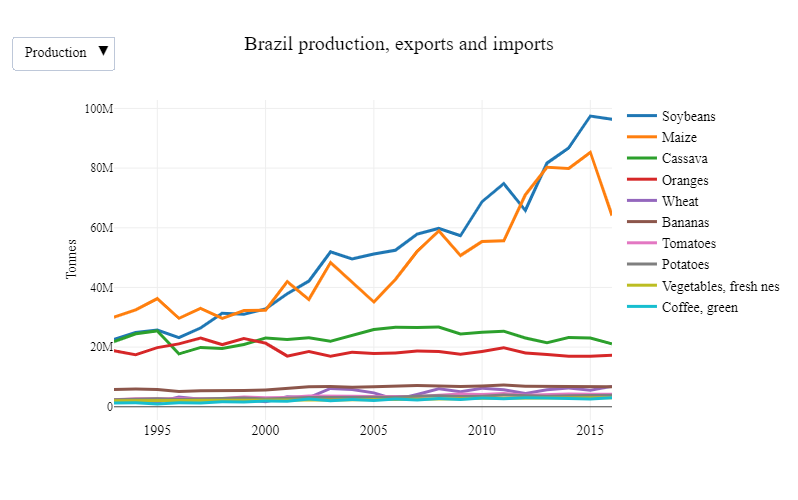

In [78]:
draft_template = go.layout.Template()
fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            x=0,
            y=1.2,
            buttons=list([
                dict(label="Production",
                     method="update",
                     args=[{"visible": [True, True, True, True, True, True, True, True, True, True,
                                        False, False, False, False, False, False, False, False, False, False,
                                       False, False, False, False, False, False, False, False, False, False]}]),
                dict(label="Exports",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, False, False, False, False,
                                       True, True, True, True, True, True, True, True, True, True,
                                       False, False, False, False, False, False, False, False, False, False]}]),
                dict(label="Imports",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, False, False, False, False,
                                       False, False, False, False, False, False, False, False, False, False,
                                       True, True, True, True, True, True, True, True, True, True]}]),
            ]),
        )
    ],
    template=draft_template,
    yaxis=dict(
        title='Tonnes',
        titlefont_size=14,
        tickfont_size=12,
    ),
    xaxis = dict(
      scaleratio = 1,
    ),
    title = 'Brazil production, exports and imports',
    width=800,
    height=500,
    font=dict(
        family="source-serif-pro",
        size=14,
        color = 'rgb(0,0,0)'
    )
    #paper_bgcolor='rgba(0,0,0,0)',
)
#fig.update_xaxes(tickvals = years)
